# Topic modelling BTM elbow method
This has not been converted to a script yet.

Get optimal number of topics based on BTM logLik value output.

TODO: need to update input file with the most up-to-date ElbowMethodData (available on our drive - basically a string version of the log, topics, and loglik values). 

NB: Need to make sure that the input LogLik column does not have any commas in the number.

[Kmeans clustering in Python](https://realpython.com/k-means-clustering-python/)

[Knee library (elbow method) documentation](https://kneed.readthedocs.io/en/stable/parameters.html#curve)


## Results
Dataset: Loglik values until 73
* 11 topics if basic normalisation (13 topics if use values to 100, but there are skips in values)
* 8 topics if no normalisation

# Get data

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator # elbow method
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d # normalise curve

In [2]:
df = pd.read_csv('../datain/topic_modelling/ElbowMethodData.csv')
df

,Log,Topics,LogLik
0,8.276746,1,-189123517
1,8.258063,2,-181160177
2,8.244208,3,-175471871
3,8.238415,4,-173147202
4,8.231924,5,-170578552
...,...,...,...
68,8.204401,69,-160103506
69,8.204227,70,-160039599
70,8.204496,71,-160138580
71,8.204630,72,-160188026


In [3]:
df.dtypes

Log       float64
Topics      int64
LogLik      int64
dtype: object

# Convert columns to numpy 2D arrays
The Elbow Method's input is 2 1D numpy arrays (one for the x values, and one for the y values)

In [5]:
topics = df[['Topics']].to_numpy()
topics

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73]])

In [7]:
loglikvals = df[['LogLik']].to_numpy()
loglikvals

array([[-189123517],
       [-181160177],
       [-175471871],
       [-173147202],
       [-170578552],
       [-169370878],
       [-168354008],
       [-167519089],
       [-167735262],
       [-166471854],
       [-166022211],
       [-165496610],
       [-165269809],
       [-164697669],
       [-164346746],
       [-164214998],
       [-164113393],
       [-163734366],
       [-163534564],
       [-163485742],
       [-163529923],
       [-163036367],
       [-163381837],
       [-162660606],
       [-162612370],
       [-162772607],
       [-162204660],
       [-162405769],
       [-162336646],
       [-162053387],
       [-161924229],
       [-161992518],
       [-161762292],
       [-161802569],
       [-161567580],
       [-161404961],
       [-161533272],
       [-161367473],
       [-161300059],
       [-161241164],
       [-161413198],
       [-161025984],
       [-161134165],
       [-161086509],
       [-160921866],
       [-160858573],
       [-161027380],
       [-1610

# Convert 2D numpy array to 1D numpy array

In [8]:
x = np.concatenate(topics).ravel()
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

In [9]:
y = np.concatenate(loglikvals).ravel()
y

array([-189123517, -181160177, -175471871, -173147202, -170578552,
       -169370878, -168354008, -167519089, -167735262, -166471854,
       -166022211, -165496610, -165269809, -164697669, -164346746,
       -164214998, -164113393, -163734366, -163534564, -163485742,
       -163529923, -163036367, -163381837, -162660606, -162612370,
       -162772607, -162204660, -162405769, -162336646, -162053387,
       -161924229, -161992518, -161762292, -161802569, -161567580,
       -161404961, -161533272, -161367473, -161300059, -161241164,
       -161413198, -161025984, -161134165, -161086509, -160921866,
       -160858573, -161027380, -161049514, -160900740, -160826809,
       -160830971, -160654281, -160635914, -160650642, -160536860,
       -160628232, -160727813, -160403478, -160500096, -160355864,
       -160395523, -160397544, -160364337, -160303121, -160258692,
       -160181803, -160157764, -160266692, -160103506, -160039599,
       -160138580, -160188026, -160005522])

# Apply Kneelocator method

### Not normalised

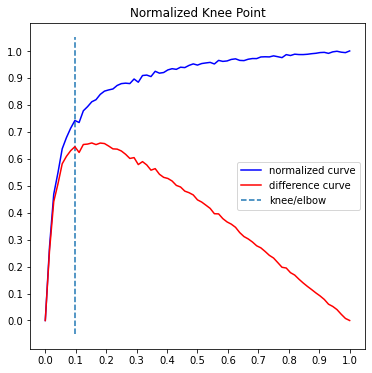

In [10]:
kl = KneeLocator(x, y, curve="concave", direction="increasing")
kl.plot_knee_normalized()

In [11]:
kl.elbow

8

### Normalised

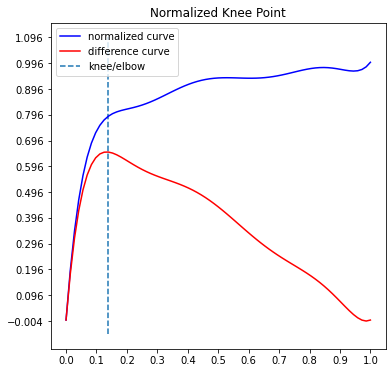

In [12]:
kl = KneeLocator(x, y, curve="concave", direction="increasing", interp_method="polynomial")
kl.plot_knee_normalized()

In [13]:
kl.elbow

11

In [14]:
kl.polynomial_degree

7